In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble, execute, QuantumRegister, ClassicalRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
from qiskit_ibm_provider import IBMProvider

from math import ceil, log2
from random import randint

from qiskit_ibm_provider import IBMProvider
import qiskit_ibm_provider

provider = IBMProvider()

In [3]:
max_num = 63
num = randint(0, max_num)
secret_string = str(bin(num)[2:])[::-1]

print(f"The secret string is {num} dec = {secret_string}. \nSo, it's not a secret anymore. But, this is a toy problem.")
print("The main purpose of this algorithm is show you quantum circuit equivalence.")

The secret string is 43 dec = 110101. 
So, it's not a secret anymore. But, this is a toy problem.
The main purpose of this algorithm is show you quantum circuit equivalence.


In [4]:
num_clbits = ceil(log2(max_num))
num_qubits = num_clbits + 1
last_qubit = num_clbits # in terms of the index

In [5]:
BV_circ = QuantumCircuit(num_qubits, num_clbits)

In [6]:
def walsh_hadamard_transform(n):
    for i in range(n):
        BV_circ.h(i)
        
def cnot_oracle(s):
    for i in range(len(s)):
        if s[i] == "1":
            BV_circ.cx(i, last_qubit)
            
def measure(k):
    for i in range(k):
        BV_circ.measure(i, i)

In [7]:
BV_circ.x(last_qubit)
BV_circ.barrier()
walsh_hadamard_transform(num_qubits)
cnot_oracle(secret_string)
walsh_hadamard_transform(num_qubits)
BV_circ.barrier()
measure(num_clbits)

In [8]:
BV_circ.draw()

░ ┌───┐     ┌───┐                     ░ ┌─┐               
q_0: ──────░─┤ H ├──■──┤ H ├─────────────────────░─┤M├───────────────
           ░ ├───┤  │  └───┘     ┌───┐           ░ └╥┘┌─┐            
q_1: ──────░─┤ H ├──┼─────────■──┤ H ├───────────░──╫─┤M├────────────
           ░ ├───┤  │  ┌───┐  │  └───┘           ░  ║ └╥┘┌─┐         
q_2: ──────░─┤ H ├──┼──┤ H ├──┼──────────────────░──╫──╫─┤M├─────────
           ░ ├───┤  │  └───┘  │       ┌───┐      ░  ║  ║ └╥┘┌─┐      
q_3: ──────░─┤ H ├──┼─────────┼────■──┤ H ├──────░──╫──╫──╫─┤M├──────
           ░ ├───┤  │  ┌───┐  │    │  └───┘      ░  ║  ║  ║ └╥┘┌─┐   
q_4: ──────░─┤ H ├──┼──┤ H ├──┼────┼─────────────░──╫──╫──╫──╫─┤M├───
           ░ ├───┤  │  └───┘  │    │       ┌───┐ ░  ║  ║  ║  ║ └╥┘┌─┐
q_5: ──────░─┤ H ├──┼─────────┼────┼────■──┤ H ├─░──╫──╫──╫──╫──╫─┤M├
     ┌───┐ ░ ├───┤┌─┴─┐     ┌─┴─┐┌─┴─┐┌─┴─┐├───┤ ░  ║  ║  ║  ║  ║ └╥┘
q_6: ┤ X ├─░─┤ H ├┤ X ├─────┤ X ├┤ X ├┤ X ├┤ H ├─░──╫──╫──╫──╫──╫──╫─
     └───┘ ░ └───┘└───┘     └───┘└───┘└───┘└───┘ ░  ║  ║  ║  ║  ║  ║ 
c: 6/═══════════════════════════════════════════════╩══╩══╩══╩══╩══╩═
                                                    0  1  2  3  4  5

#### Can you try to build an equivalent circuit using the identity that we discussed today?

#### Let's simulate BV_circ and your circuit: 

In [9]:
def aer_simulate_circuit(qc):
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc,backend, shots = 1024)
    result = job.result()         
    return result.get_counts()

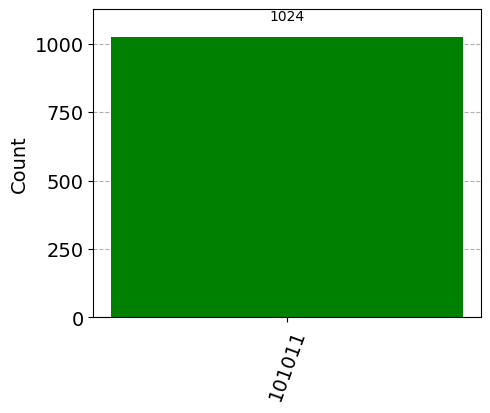

In [10]:
plot_histogram(aer_simulate_circuit(BV_circ), figsize=(5, 4), color='green') 

In [ ]:
#Uncomment the line below and insert your circuit in the template. 
#plot_histogram(aer_simulate_circuit(<YOUR CIRCUIT HERE>), figsize=(5, 4), color='blue') 